<a href="https://colab.research.google.com/github/RafaelYano/Aula_DataScience/blob/main/ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Caso não se tenha o sp.csv.txt: https://drive.google.com/file/d/1i1NUGUsAw84dAxe5sFFxtwAob_64frfK/view?usp=sharing, ou o dados abaixo:
#fonte =  "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
#dados = pd.read_csv(fonte)

dados = pd.read_csv("/content/sp.csv.txt", sep=";")
dados

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEACECDBADBEABAAEAEACAAAECBEEEBACACCDEDACADCB,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B
1,14849,190001019476,2019,3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,B,B,4,C,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,A
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,BCDCABABABBCBAEEEBCACACAEDBCCAEBEABEADBAEACCB,BDABE99999BCBDADDBDCDAAECDEECDBCBCCDEDAACDEDBB...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,AC.BECDABAECBCBBEAACA.EDCDEAEAADCEABDAAACEBCC,99999CBEAEBBCEDBABEBDAADCEAEDEBBEACACACACDCEDB...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B
4,20303,190001024931,2019,3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3,C,A,B,C,A,B,B,A,A,A,B,A,A,A,A,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813767,5094426,190006119053,2019,3550308,São Paulo,35,SP,17,F,1,2,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,35925457.0,3550308.0,São Paulo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,DDACEBECDCCABCAEEBBABABCCCDAEDDABDEDBDDCDCAEE,99999ADAAAEDEBDCBEBBBAADCDBCDEEBDCEDEDAABACECB...,CBDBEAECBCAAEAECAEECBEEADDBEBCCCCECACEAABBCCA

## Dados analisados em aula

Um dos dados observados em aula fora sobre os alunos que fizeram a prova do enem fora de seu estado de residênca

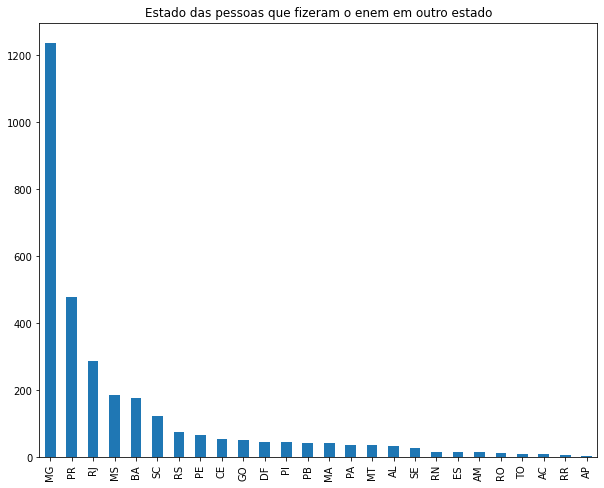

In [ ]:
#separando as pessoas que fizeram a prova em um estado diferente do seu estado de residência e colocando no gráfico onde estas foram realizados
dados.query("SG_UF_RESIDENCIA != SG_UF_PROVA")["SG_UF_PROVA"].value_counts().plot.bar(figsize=(10,8), title= "Estado das pessoas que fizeram o enem em outro estado" )


Como pode ser observado, a maioria das pessoas que residem em São Paulo e que realizaram a prova em outro estado, a fizeram principalmente em Minas Gerais, seguidos por Rio de Janeiro, Paraná e Mato Grosso do Sul, Estados que fazem divisa com São Paulo. Os motivos para se efetuar a prova em outro estado pode ser por estes terem nascido em outros Estados ou estudarem em escolas de outro estado

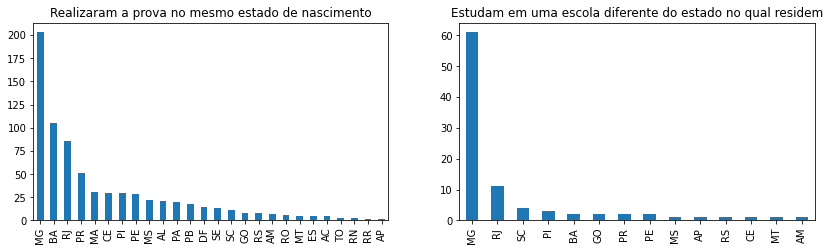

In [ ]:
#Vendo que realizou a prova no mesmo estado de nascimento
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
dados.query("SG_UF_RESIDENCIA != SG_UF_PROVA & SG_UF_PROVA == SG_UF_NASCIMENTO ")["SG_UF_PROVA"].value_counts().plot.bar( title= "Realizaram a prova no mesmo estado de nascimento" )
#Quem estuda em uma escola em outro estado
plt.subplot(2,2,2)
dados.query("SG_UF_RESIDENCIA != SG_UF_PROVA & SG_UF_ESC != SG_UF_RESIDENCIA ")["SG_UF_ESC"].value_counts().plot.bar(title= "Estudam em uma escola diferente do estado no qual residem" )


De fato, há pessoas que voltaram ao seu Estado de nascimento ou que realizaram a prova na escola em que estudam. Em todo caso, Minas Gerais continua sendo o Estado com maior representatividade. 

Olhando-se para quem fez a prova em Minas Gerais e mora em São Paulo:

In [ ]:
#Municípios de quem realizou a prova em minas gerais
prova_MG = dados.query("SG_UF_PROVA == 'MG'")["NO_MUNICIPIO_RESIDENCIA"]
prova_MG.value_counts()

Águas de Lindóia       320
Igarapava              143
São Paulo               96
São José dos Campos     40
Ribeirão Preto          39
                      ... 
Barra Bonita             1
Ibaté                    1
Potim                    1
Sandovalina              1
Serrana                  1
Name: NO_MUNICIPIO_RESIDENCIA, Length: 197, dtype: int64

As cidades com valores mais expressivos são Águas de Lindóia e Igarapava, cidades muito próximas de MG. Pode-se dizer que, além do Estado de nascimento ser Minas Gerais, a proximidade para com o Estado influência para que as pessoas façam provas em Minas Gerais. Águas de Lindóia é a cidade que teve maior número de alunos realizando prova em Minas Gerais.

Cidades em que, vestibulandos que moram em Água de Lindóia, fazem o ensino médio: 

In [ ]:
a_lindoia = dados.query("NO_MUNICIPIO_RESIDENCIA == 'Águas de Lindóia'")
a_lindoia["NO_MUNICIPIO_ESC"].value_counts()

Águas de Lindóia     96
Monte Sião           13
Amparo                5
Lindóia               2
Engenheiro Coelho     2
Name: NO_MUNICIPIO_ESC, dtype: int64

In [ ]:
#verificando se os dados foram preenchidos
a_lindoia["NO_MUNICIPIO_ESC"]

61                     NaN
70                     NaN
76        Águas de Lindóia
83        Águas de Lindóia
85                     NaN
                ...       
793939                 NaN
795954                 NaN
798146                 NaN
811010                 NaN
813465                 NaN
Name: NO_MUNICIPIO_ESC, Length: 355, dtype: object

Fora considerado que um dos motivos para haver tantos alunos de Águas de Lindóia fazendo ENEM em Minas Gerais, seria pelo fato de muitos destes estudarem em escolas de Monte Sião-MG. Apesar disso, muitos não informaram em qual cidade estudam.

Outro dado analisado é quanto a aspectos sociais 

Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

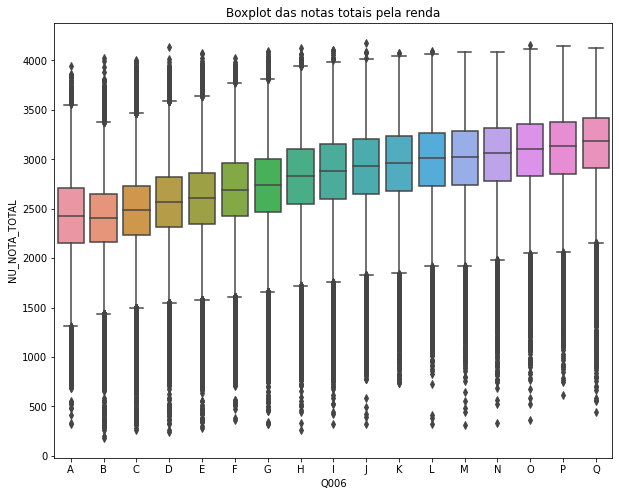

In [ ]:
#Obetendo o total de notas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] =dados[provas].sum(axis = 1)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO","NU_NOTA_TOTAL"]
#ordenando Q006, renda mensal
renda = dados["Q006"].unique()
renda[0:16].sort()
# Selecionando as notas sem 0
dados_sem_notas_zeros = dados.query("NU_NOTA_TOTAL != 0")
#Criando um boxplot ordenado
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zeros, order = renda)
plt.title("Boxplot das notas totais pela renda")

É possível observar que há um aumento das notas a medida que se a renda familiar se torna mais alta.

In [ ]:
medianas_renda = pd.DataFrame()
medianas_renda["moda_A"] = dados_sem_notas_zeros.query("Q006 == 'A'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_B"] = dados_sem_notas_zeros.query("Q006 == 'B'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_C"] = dados_sem_notas_zeros.query("Q006 == 'C'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_D"] = dados_sem_notas_zeros.query("Q006 == 'D'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_E"] = dados_sem_notas_zeros.query("Q006 == 'E'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_F"] = dados_sem_notas_zeros.query("Q006 == 'F'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_G"] = dados_sem_notas_zeros.query("Q006 == 'G'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_H"] = dados_sem_notas_zeros.query("Q006 == 'H'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_I"] = dados_sem_notas_zeros.query("Q006 == 'I'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_J"] = dados_sem_notas_zeros.query("Q006 == 'J'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_K"] = dados_sem_notas_zeros.query("Q006 == 'K'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_L"] = dados_sem_notas_zeros.query("Q006 == 'L'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_M"] = dados_sem_notas_zeros.query("Q006 == 'M'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_N"] = dados_sem_notas_zeros.query("Q006 == 'N'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_O"] = dados_sem_notas_zeros.query("Q006 == 'O'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_P"] = dados_sem_notas_zeros.query("Q006 == 'P'")["NU_NOTA_TOTAL"].mode()
medianas_renda["moda_Q"] = dados_sem_notas_zeros.query("Q006 == 'Q'")["NU_NOTA_TOTAL"].mode()
#Verificando a nota mais frequntes para cada classe de renda
medianas_renda

,moda_A,moda_B,moda_C,moda_D,moda_E,moda_F,moda_G,moda_H,moda_I,moda_J,moda_K,moda_L,moda_M,moda_N,moda_O,moda_P,moda_Q
0,2589.7,2476.0,2547.3,2579.0,2492.3,2649.4,2660.0,2976.0,2692.0,2993.8,3065.1,2859.2,2864.7,3135.0,3109.0,3127.5,3201.4


Observando também a moda, as notas mais frequentes, para cada classe de renda

Em relação as notas, é possível observar quais notas têm relação entre si, usado de suas correlações

Text(0.5, 1.0, 'São Paulo')

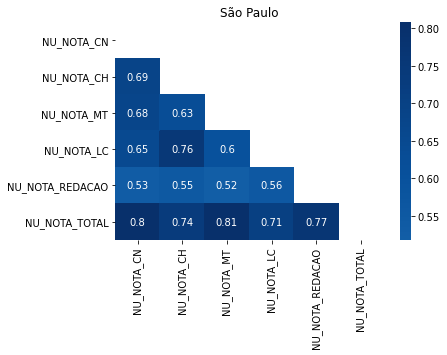

In [ ]:
correlacao = dados_sem_notas_zeros[provas].corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True, mask=mask)
plt.title("São Paulo")

As correlações para as notas totais, por ser composto por todas as outras, iria mesmo possuir uma maior correlação com as outras matérias. Observando as notas de matemáticas e ciências naturais, estas têm maior relação com a nota total, seguidos por redação. Quanto às outras matérias, a maior correlação é entre ciências humanas e linguagens e códigos.  

## Análise de quem prestou o enem com mais de 35 anos

Um dos dados analisados durante o curso fora sobre os alunos com menos de 14 anos, neste relatório será analisado os vestibulandos que tem mais de 35 anos, a intenção é ver quem estaria prestando o enem e não é um estudante do ensino médio ou que ficou alguns anos fazendo cursinho, deste modo, procurar entender quem são esses participantes, se estão tentando mudar de carreira ou se não tiveram oportunidade de estudar antes , já que estão aposentados e aproveitaram para fazer a prova por algum motivo

Primeiramente observando as idades dos participantes no geral

In [ ]:
#obtendo a media, mediana e moda das idades ds participantes
media_idade = dados["NU_IDADE"].mean()
moda_idade = dados["NU_IDADE"].mode()
mediana_idade = dados["NU_IDADE"].median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == '__main__':


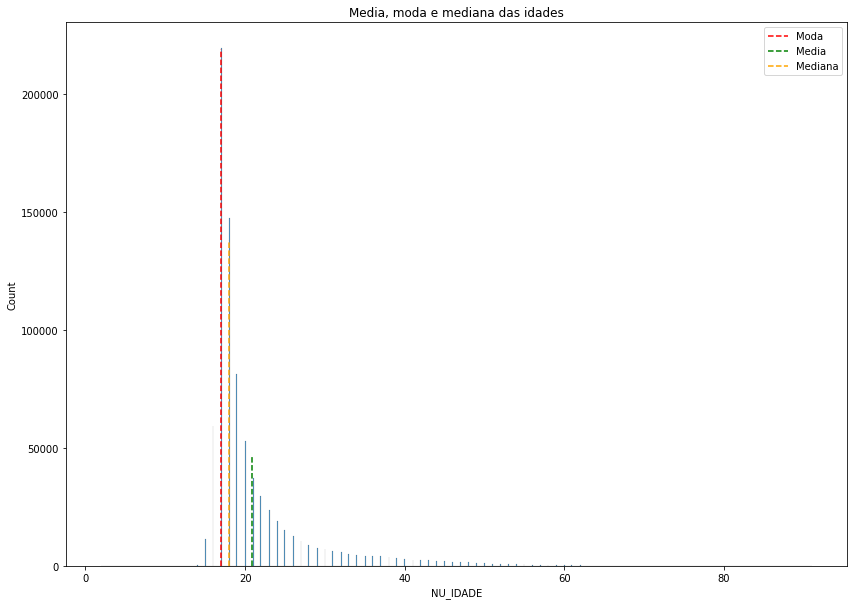

In [ ]:
#detalhes do grafico
plt.figure(figsize=(14,10))
l_moda = plt.axvline(x=moda_idade[0], ymax=.95 ,color="red", linestyle = "--")
l_media = plt.axvline(x=media_idade, ymax = .2 ,color="green", linestyle = "--")
l_mediana = plt.axvline(x=mediana_idade, ymax=.6 ,color="orange", linestyle = "--")
#montando o gráfico
sns.histplot(data=dados, x = "NU_IDADE")
plt.title("Media, moda e mediana das idades")
plt.legend([l_moda, l_media, l_mediana], labels = ["Moda", "Media", "Mediana"] )
plt.show()

A grande maioria são alunos de 17 e 18 anos. Agora selecionando as pessoas com 35 anos ou mais

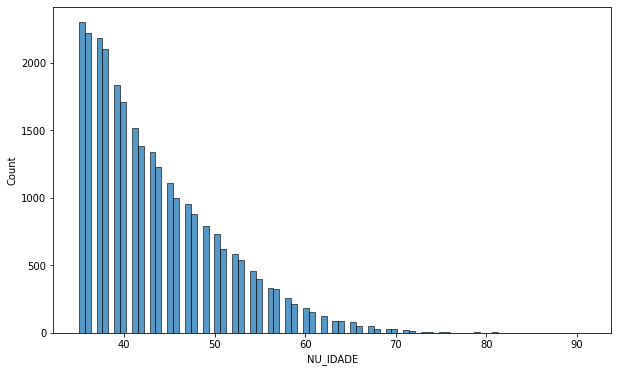

In [ ]:
dados_idade = dados_sem_notas_zeros.query("NU_IDADE >=35 ")
plt.figure(figsize=(10,6))
sns.histplot(data=dados_idade, x = "NU_IDADE")

A maioria dos membros desta amostra tem entre 35 e 45 anos. O próximo gráfico se observa como essas pessoas foram no enem, de acordo com a sua idade.

Text(0.5, 1.0, 'Olhando para as notas totais pela idade')

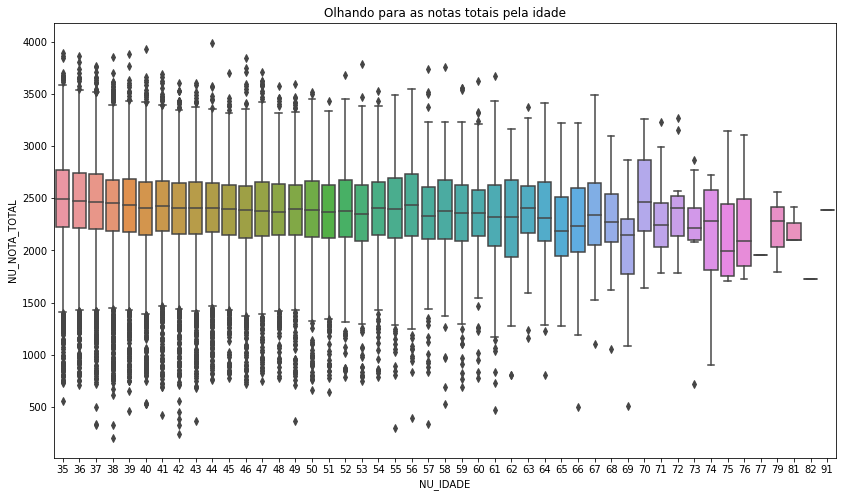

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x="NU_IDADE", y = "NU_NOTA_TOTAL", data = dados_idade)
plt.title("Olhando para as notas totais pela idade")

Pode ser visto um leve declínio na nota conforme o aumento de idade, porém quanto maior a idade, se tem menos dados a serem analisados, o que pode tornar a comparação um pouco difícil, quanto a renda destas pessoas.

Text(0.5, 0.98, 'Renda pela idade')

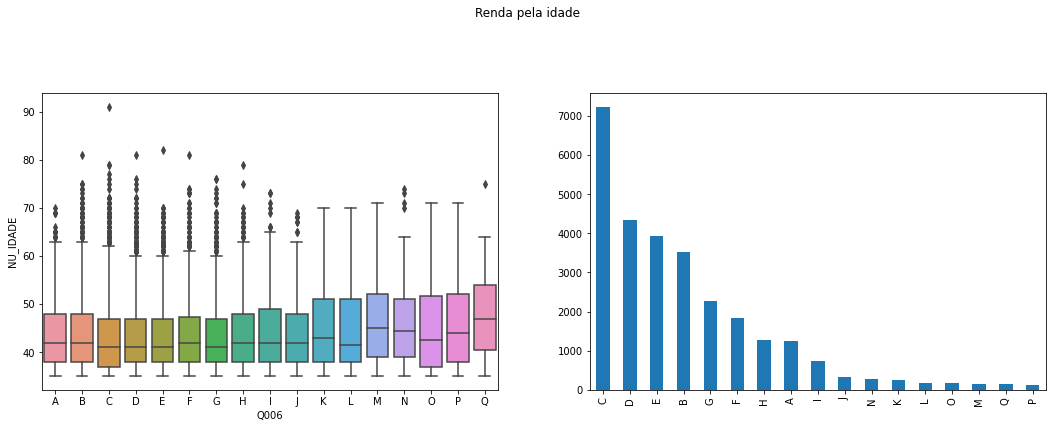

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.boxplot(x="Q006", y = "NU_IDADE", data = dados_idade, order = renda)
plt.subplot(2,2,2)
dados_idade["Q006"].value_counts().plot.bar()
plt.suptitle("Renda pela idade")

C representa uma renda de 998,01 reais até R$ 1.497,00, que seria a maioria dos membros desta amostra, seguido por B, E e D, ou seja a maioria destes participantes tem uma renda que varia de 998,00 reais até 2.495,00, além disso, nesta faixa as idades variam, principalmete entre 35 e 48 anos.

Baseado apenas em opinião, os participantes acima de 70 anos, como estariam fazendo a prova sem realmente precisar e uma vez que existe grandes chances de já serem aposentados, seriam em sua maioria pessoas com maior renda por estarem fazendo a prova por "luxo", novamente tudo isso apenas uma opinião que se mostrou errada, assim será analisado estes casos

Text(0.5, 0.98, 'Pessoas com mais de 70 anos')

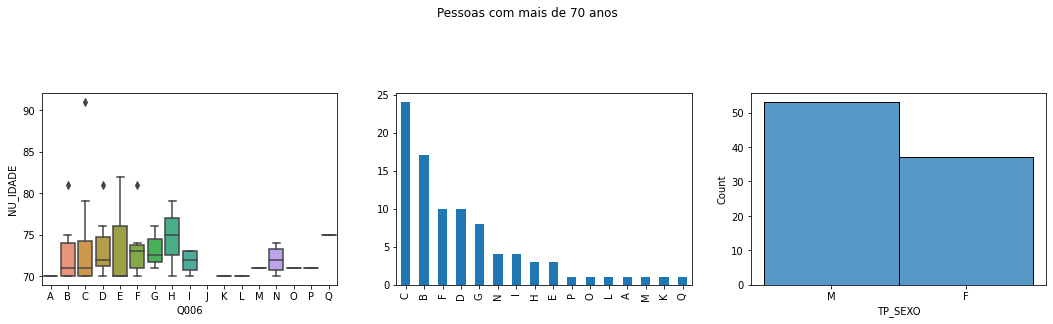

In [ ]:
#separando as pessoa com mais de 70 anos
dados_maior_idade = dados_sem_notas_zeros.query("NU_IDADE >=70")

plt.figure(figsize=(18,12))
#Idade por renda
plt.subplot(3,3,1)
sns.boxplot(x="Q006", y = "NU_IDADE", data = dados_maior_idade, order = renda)
#Quantas pessoas em cada classe
plt.subplot(3,3,2)
dados_maior_idade["Q006"].value_counts().plot.bar()
#Sexo dos participantes
plt.subplot(3,3,3)
sns.histplot(data=dados_maior_idade, x = "TP_SEXO")
plt.suptitle("Pessoas com mais de 70 anos")


Estas pessoas ganham entre 998,00 e  1.497,00, por conta da idade isso é provável de ser suas aposentadorias, como existe a redução no salário pela previdência social e isso depende do quanto eles contribuiram para  aprevidência, não se pode afirmar a situação financeira destas pessoas, apenas de que provavelmente estes não estariam fazendo o enem para começar outra carreira, mesmo que sempre existe exceções, talvez o motivo seja um desafio pessoal ou uma vontade de fazer uma faculdade da qual não teve oportunidade antes. Não esxite uma diferença muto grande no número de homens e mulheres

A próxima análise é sobre a formação destas pessoa, se elas já estão formadas no ensino médio e quando se formaram

Text(0.5, 0.98, 'Formação do ensino médio')

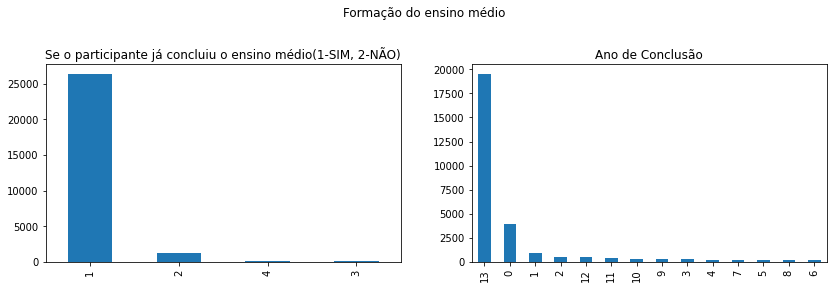

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
dados_idade["TP_ST_CONCLUSAO"].value_counts().plot.bar(title = "Se o participante já concluiu o ensino médio(1-SIM, 2-NÃO)")
plt.subplot(2,2,2)
dados_idade["TP_ANO_CONCLUIU"].value_counts().plot.bar(title="Ano de Conclusão")
plt.suptitle("Formação do ensino médio")


O número 0 representa as pessoas que não informaram o ano de conclusão no endsino médio, 13 quer dizer que estes se formaram antes de 2007, e assim de 12 a 0 vai de 2007 até 2018. Como pode-se observar, a maioria já estava formada no ensino médio, uma menor parte provavelmente levou mais tempo para se formar ou não teve a oportunidade de fazê-lo antes.

Por fim, as pessoas com mais de 35 anos parecem em sua maioria, ganhar entre um a três salários mínimos, se formaram no ensino médio antes de 2007 e em sua maioria tem entre 35 a 48 anos, não sendo uma idade comum para aposentados, logo pode-se concluir que estes já estão trabalhando ou já trabalharam e viram no ENEM uma oportunidade para melhorar profissionalmente. 